Source: https://www.geeksforgeeks.org/implement-deep-autoencoder-in-pytorch-for-image-reconstruction/

## Step 1: Loading data and printing some sample images from the training set.

Initializing Transform: Firstly, we initialize the transform which would be applied to each entry in the attained dataset. Since Tensors are internal to Pytorch’s functioning, we first convert each item to a tensor and normalize them to limit the pixel values between 0 & 1. This is done to make the optimization process easier and faster.
Downloading Dataset: Then, we download the dataset using the torchvision.datasets utility and store it on our local machine in the folder ./MNIST/train and ./MNIST/test for both training and testing sets. We also convert these datasets into data loaders with batch sizes equal to 256 for faster learning. The reader is encouraged to play around with these values and expect consistent results.
Plotting Dataset: Lastly, we randomly print out 25 images from the dataset to better view the data we’re dealing with.

22.6%

100.1%

Extracting ./MNIST/train/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw


100.4%

Extracting ./MNIST/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw
Extracting ./MNIST/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw


180.4%

Extracting ./MNIST/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw
Processing...


23.1%

Done!


100.1%

Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw


100.4%

Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw
Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw


180.4%

Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw
Processing...
Done!


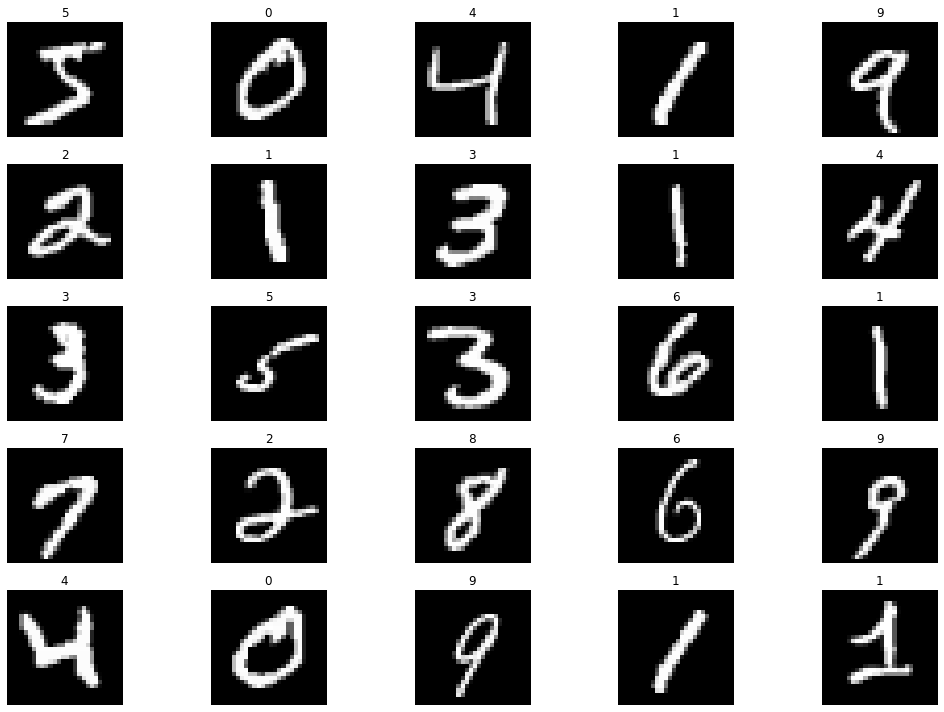

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10

# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

# Creating Dataloaders from the
# training and testing dataset
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=256)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=256)

# Printing 25 random images from the training dataset
random_samples = np.random.randint(
    1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Step 2: Initializing the Deep Autoencoder model and other hyperparameters

As described above, the encoder layers form the first half of the network, i.e., from Linear-1 to Linear-7, and the decoder forms the other half from Linear-10 to Sigmoid-15. We’ve used the torch.nn.Sequential utility for separating the encoder and decoder from one another. This was done to give a better understanding of the model’s architecture. After that, we initialize some model hyperparameters such that the training is done for 100 epochs using the Mean Square Error loss and Adam optimizer for the learning process.

In [5]:
# Creating a DeepAutoencoder class
class DeepAutoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 10)
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 28 * 28),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Instantiating the model and hyperparameters
model = DeepAutoencoder()
criterion = torch.nn.MSELoss()
num_epochs = 10 # Wenqi: original iteration = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


## Step 3: Training loop

The training loop iterates for the 100 epochs and does the following things:

Iterates over each batch and calculates loss between the outputted image and the original image(which is the output).
Averages out the loss for each batch and stores images and their outputs for each epoch.
After the loop ends, we plot out the training loss to better understand the training process. As we can see, that the loss decreases for each consecutive epoch, and thus the training can be deemed successful.

epoch  0
epoch  1
epoch  2
epoch  3
epoch  4
epoch  5
epoch  6
epoch  7
epoch  8
epoch  9


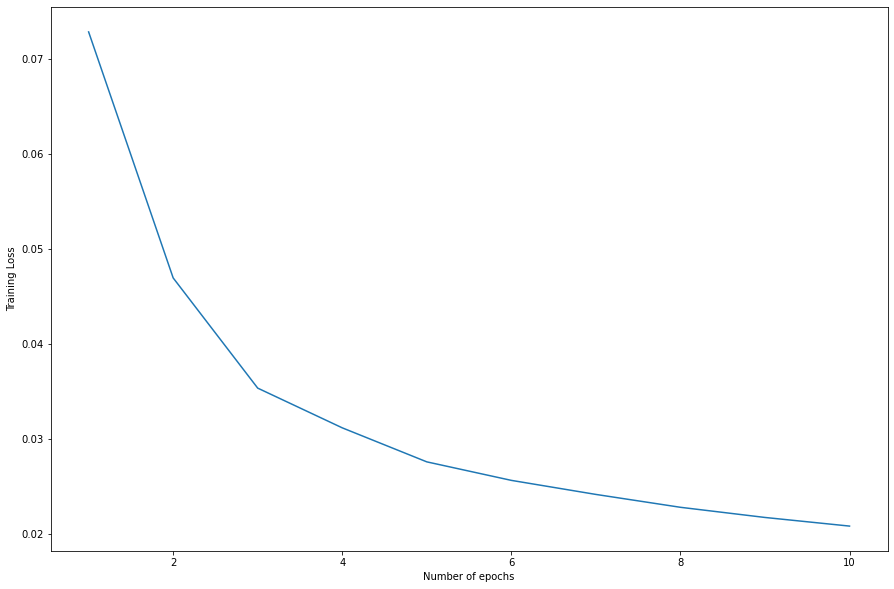

In [8]:
# List that will store the training loss
train_loss = []

# Dictionary that will store the
# different images and outputs for
# various epochs
outputs = {}

batch_size = len(train_loader)

# Training loop starts
for epoch in range(num_epochs):

    print("epoch ", epoch)
    # Initializing variable for storing
    # loss
    running_loss = 0
    
    # Iterating over the training dataset
    for batch in train_loader:

        # Loading image(s) and
        # reshaping it into a 1-d vector
        img, _ = batch
        img = img.reshape(-1, 28*28)

        # Generating output
        out = model(img)

        # Calculating loss
        loss = criterion(out, img)

        # Updating weights according
        # to the calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Incrementing loss
        running_loss += loss.item()

    # Averaging out loss over entire batch
    running_loss /= batch_size
    train_loss.append(running_loss)

    # Storing useful images and
    # reconstructed outputs for the last batch
    outputs[epoch+1] = {'img': img, 'out': out}


# Plotting the training loss
plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()


In [12]:

for batch in train_loader:

    # Loading image(s) and
    # reshaping it into a 1-d vector
    img, _ = batch
    print(img.shape)
    img = img.reshape(-1, 28*28)
    print(img.shape)
    break

torch.Size([256, 1, 28, 28])
torch.Size([256, 784])


## Step 4: Visualizing the reconstruction

The best part of this project is that the reader can visualize the reconstruction of each epoch and understand the iterative learning of the model.

We firstly plot out the first 5 reconstructed(or outputted images) for epochs = [1, 5, 10, 50, 100].
Then we also plot the corresponding original images on the bottom for comparison.
We can see how the reconstruction improves for each epoch and gets very close to the original by the last epoch.

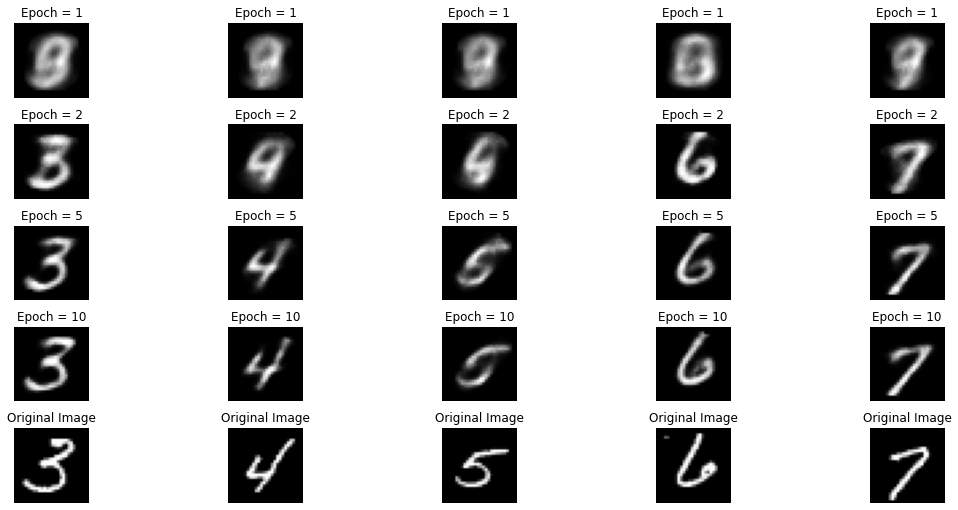

In [10]:
# Plotting is done on a 7x5 subplot
# Plotting the reconstructed images

# Initializing subplot counter
counter = 1

# Plotting reconstructions
# for epochs = [1, 2, 5, 10]
epochs_list = [1, 2, 5, 10]

# Iterating over specified epochs
for val in epochs_list:

    # Extracting recorded information
    temp = outputs[val]['out'].detach().numpy()
    title_text = f"Epoch = {val}"

    # Plotting first five images of the last batch
    for idx in range(5):
        plt.subplot(7, 5, counter)
        plt.title(title_text)
        plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')
        plt.axis('off')

        # Incrementing the subplot counter
        counter+=1

# Plotting original images

# Iterating over first five
# images of the last batch
for idx in range(5):

    # Obtaining image from the dictionary
    val = outputs[10]['img']

    # Plotting image
    plt.subplot(7,5,counter)
    plt.imshow(val[idx].reshape(28, 28),
            cmap = 'gray')
    plt.title("Original Image")
    plt.axis('off')

    # Incrementing subplot counter
    counter+=1

plt.tight_layout()
plt.show()


## Step 5: Checking performance on the test set.

Good practice in machine learning is to check the model’s performance on the test set also. To do that, we do the following steps:

Generate outputs for the last batch of the test set.
Plot the first 10 outputs and corresponding original images for comparison.
As we can see, the reconstruction was excellent on this test set also, which completes the pipeline.

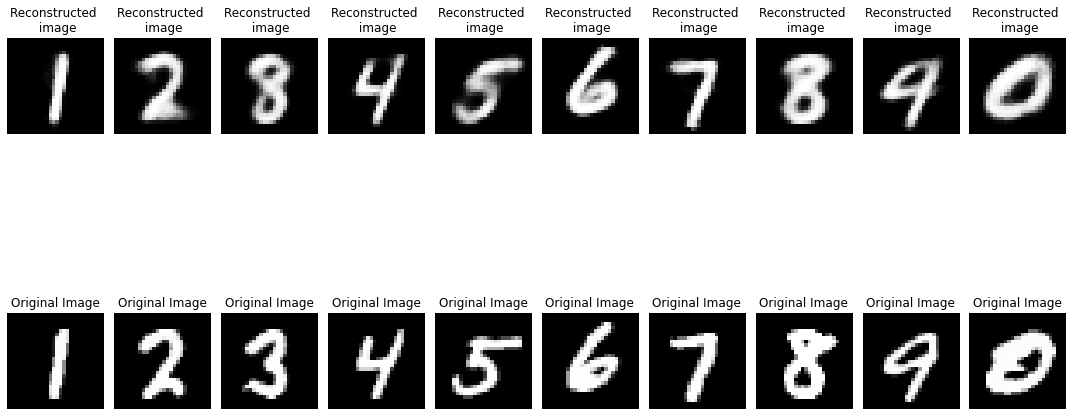

In [22]:
# Dictionary that will store the different
# images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test
# dataset
img, _ = list(test_loader)[-1]

# Reshaping into 1d vector
img = img.reshape(-1, 28 * 28)

# Generating output for the obtained
# batch
out = model(img)

# Storing information in dictionary
outputs['img'] = img
outputs['out'] = out

# Plotting reconstructed images
# Initializing subplot counter
counter = 1
val = outputs['out'].detach().numpy()

# Plotting first 10 images of the batch
for idx in range(10):
    plt.subplot(2, 10, counter)
    plt.title("Reconstructed \n image")
    plt.imshow(val[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Incrementing subplot counter
    counter += 1

# Plotting original images

# Plotting first 10 images
for idx in range(10):
    val = outputs['img']
    plt.subplot(2, 10, counter)
    plt.imshow(val[idx].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Incrementing subplot counter
    counter += 1

plt.tight_layout()
plt.show()


torch.Size([784]) tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000

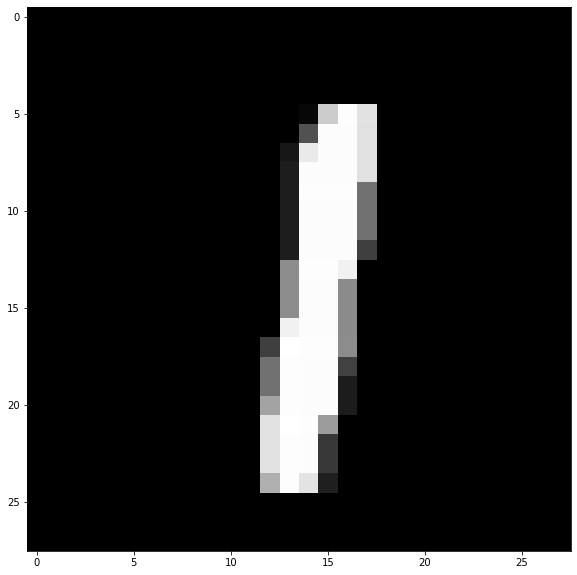

In [31]:
plt.imshow(val[0].reshape(28, 28), cmap='gray')
print(val[0].shape, val[0])

In [16]:
# Dictionary that will store the different
# images and outputs for various epochs
outputs = {}

# Extracting the last batch from the test
# dataset
img, _ = list(test_loader)[-1]

# Reshaping into 1d vector
img = img.reshape(-1, 28 * 28)

# Generating output for the obtained
# batch
out = model(img)

In [17]:
print('img', img.shape)
print('out', out.shape)
print('val', val.shape)

img torch.Size([16, 784])
out torch.Size([16, 784])
val torch.Size([16, 784])


In [26]:
bottleneck = model.encoder(img)
labels = torch.argmax(bottleneck, dim=1)
print(bottleneck)

tensor([[ -3.8498,  -9.5863,  -8.0914,  -0.9892,   8.1842, -12.0793,   4.4201,
           2.6873,  -8.8094,   8.0561],
        [-10.3869,  -4.5587,  -5.5253,  -3.1586,   6.6340,  -6.8373,  -4.9925,
           4.9329,  -7.2343,   0.9256],
        [ -9.8125,  -7.5718,  -8.4465,  -3.9353,   6.8676,  -2.1364,  -1.4873,
           4.5873,  -5.3662,   2.1428],
        [ -8.6476, -19.1308,  -0.3829, -12.1751,   1.8007, -10.5087,   3.5044,
          -2.3773,  -4.5979,   5.1979],
        [ -6.3381,  -8.1145, -12.6905,  -9.9659,   3.2366,  -2.7382,   0.2512,
           2.8178,  -3.6698,   5.8006],
        [ -9.1398, -10.4784, -10.5188,  -3.4669,  -1.7711,  -5.5733,   0.6559,
           7.7798,   1.8844,   7.4537],
        [ -7.8526,  -7.5383,  -3.1350,  -4.7620,   5.1894, -12.1695,   1.8355,
          -1.2301, -11.5557,   5.9229],
        [-11.1912, -10.7408, -10.6782,  -5.6009,   6.9512,  -0.7004,  -5.0752,
           6.7596,  -7.3426,   5.1739],
        [ -9.2191, -12.3394,  -2.7626, -10.6380,

In [32]:
print(labels.shape, labels)
print(labels[:10])

torch.Size([16]) tensor([4, 4, 4, 9, 9, 7, 9, 4, 9, 9, 9, 7, 7, 9, 9, 7])
tensor([4, 4, 4, 9, 9, 7, 9, 4, 9, 9])


In [35]:
# try argmin apart of argmax
labels = torch.argmin(bottleneck, dim=1)
print(bottleneck)
print(labels.shape, labels)
print(labels[:10])

tensor([[ -3.8498,  -9.5863,  -8.0914,  -0.9892,   8.1842, -12.0793,   4.4201,
           2.6873,  -8.8094,   8.0561],
        [-10.3869,  -4.5587,  -5.5253,  -3.1586,   6.6340,  -6.8373,  -4.9925,
           4.9329,  -7.2343,   0.9256],
        [ -9.8125,  -7.5718,  -8.4465,  -3.9353,   6.8676,  -2.1364,  -1.4873,
           4.5873,  -5.3662,   2.1428],
        [ -8.6476, -19.1308,  -0.3829, -12.1751,   1.8007, -10.5087,   3.5044,
          -2.3773,  -4.5979,   5.1979],
        [ -6.3381,  -8.1145, -12.6905,  -9.9659,   3.2366,  -2.7382,   0.2512,
           2.8178,  -3.6698,   5.8006],
        [ -9.1398, -10.4784, -10.5188,  -3.4669,  -1.7711,  -5.5733,   0.6559,
           7.7798,   1.8844,   7.4537],
        [ -7.8526,  -7.5383,  -3.1350,  -4.7620,   5.1894, -12.1695,   1.8355,
          -1.2301, -11.5557,   5.9229],
        [-11.1912, -10.7408, -10.6782,  -5.6009,   6.9512,  -0.7004,  -5.0752,
           6.7596,  -7.3426,   5.1739],
        [ -9.2191, -12.3394,  -2.7626, -10.6380,

### Wenqi: The bottleneck layer's value != cluster ID!

As shown above, the first 10 images are digit 1 to 10. While the predicted argmax(bottleneck) are [4, 4, 4, 9, 9, 7, 9, 4, 9, 9]. This means some the hidden feature (e.g., 4 th and 9 th dimensions) have inherently high values.